# Libraries


In [124]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Perceptron
import seaborn as sns
import matplotlib.pyplot as plt

# LOad and Split Data set

In [125]:
dataset = pd.read_csv('Q2 Sentiment Analysis Dataset.csv', encoding='latin-1', usecols=[0, 1, 2, 3])
class_names = [1, 3, 5, 'not_relevant']
X = dataset['text']
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
dataset.head()

,id,sentiment,date,text
0,623495523,1,Mon Dec 01 20:46:01 +0000 2014,WTF MY BATTERY WAS 31% ONE SECOND AGO AND NOW ...
1,623495527,1,Mon Dec 01 21:09:50 +0000 2014,@apple Contact sync between Yosemite and iOS8 ...
2,623495529,1,Mon Dec 01 21:35:14 +0000 2014,WARNING IF YOU BUY AN IPHONE 5S UNLOCKED FROM ...
3,623495536,1,Mon Dec 01 23:55:55 +0000 2014,"@Apple, For the love of GAWD, CENTER the '1'on..."
4,623495537,1,Tue Dec 02 00:06:05 +0000 2014,i get the storage almost full notification lit...


# Bag of Word

In [126]:
vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)
df_train = pd.DataFrame(X_train_counts.toarray(), columns=vectorizer.get_feature_names_out())
df_test = pd.DataFrame(X_test_counts.toarray(), columns=vectorizer.get_feature_names_out())

print("Bag of Words for Training Data:")
print(df_train.values[:5])
print("\nBag of Words for Testing Data:")
print(df_test.values[:5])

Bag of Words for Training Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bag of Words for Testing Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


# TF_IDF Bag Of word

In [127]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
df_train_tfidf = pd.DataFrame(X_train_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
df_test_tfidf = pd.DataFrame(X_test_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print("Bag of Words based on TF-IDF for Training Data:")
print(df_train_tfidf.values[:5])
print("\nBag of Words based on TF-IDF for Testing Data:")
print(df_test_tfidf.values[:5])

Bag of Words based on TF-IDF for Training Data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]

Bag of Words based on TF-IDF for Testing Data:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# N_Grams

In [128]:
# Unigrams
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))
X_train_unigrams = unigram_vectorizer.fit_transform(X_train)
X_test_unigrams = unigram_vectorizer.transform(X_test)
df_train_unigrams = pd.DataFrame(X_train_unigrams.toarray(), columns=unigram_vectorizer.get_feature_names_out())
df_test_unigrams = pd.DataFrame(X_test_unigrams.toarray(), columns=unigram_vectorizer.get_feature_names_out())
print("Bag of Words based on unigrams for Training Data:")
print(df_train_unigrams.values[:5])
print("\nBag of Words based on unigrams for Testing Data:")
print(df_test_unigrams.values[:5])
# Bigrams
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
X_train_bigrams = bigram_vectorizer.fit_transform(X_train)
X_test_bigrams = bigram_vectorizer.transform(X_test)
df_train_bigrams = pd.DataFrame(X_train_bigrams.toarray(), columns=bigram_vectorizer.get_feature_names_out())
df_test_bigrams = pd.DataFrame(X_test_bigrams.toarray(), columns=bigram_vectorizer.get_feature_names_out())
print("\nBag of Words based on bigrams for Training Data:")
print(df_train_bigrams.values[:5])
print("\nBag of Words based on bigrams for Testing Data:")
print(df_test_bigrams.values[:5])
# Trigrams
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
X_train_trigrams = trigram_vectorizer.fit_transform(X_train)
X_test_trigrams = trigram_vectorizer.transform(X_test)
df_train_trigrams = pd.DataFrame(X_train_trigrams.toarray(), columns=trigram_vectorizer.get_feature_names_out())
df_test_trigrams = pd.DataFrame(X_test_trigrams.toarray(), columns=trigram_vectorizer.get_feature_names_out())
print("\nBag of Words based on trigrams for Training Data:")
print(df_train_trigrams.values[:5])
print("\nBag of Words based on trigrams for Testing Data:")
print(df_test_trigrams.values[:5])


Bag of Words based on unigrams for Training Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bag of Words based on unigrams for Testing Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bag of Words based on bigrams for Training Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bag of Words based on bigrams for Testing Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bag of Words based on trigrams for Training Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Bag of Words based on trigrams for Testing Data:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [129]:
results = {'Classifier': [], 'Vectorizer': [], 'Accuracy': [], 'Classification Report': []}
vectorizers = {
    'Bag of Words (Raw Counts)': CountVectorizer(),
    'Bag of Words (TF-IDF)': TfidfVectorizer(),
    'Unigrams': CountVectorizer(ngram_range=(1, 1)),
    'Bigrams': CountVectorizer(ngram_range=(2, 2)),
    'Trigrams': CountVectorizer(ngram_range=(3, 3)),
}


# Nave bise

In [ ]:
classifiers = {
    'Naïve Bayes': MultinomialNB(),
}
for clf_name, clf in classifiers.items():
    for vec_name, vectorizer in vectorizers.items():
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        results['Classifier'].append(clf_name)
        results['Vectorizer'].append(vec_name)
        results['Accuracy'].append(accuracy)
        results['Classification Report'].append(classification_rep)


Results for Naïve Bayes with Bag of Words (Raw Counts) :
Accuracy: 0.7262210796915167
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.80      0.72       264
           3       0.78      0.81      0.79       428
           5       0.67      0.11      0.19        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.73       778
   macro avg       0.53      0.43      0.43       778
weighted avg       0.71      0.73      0.70       778



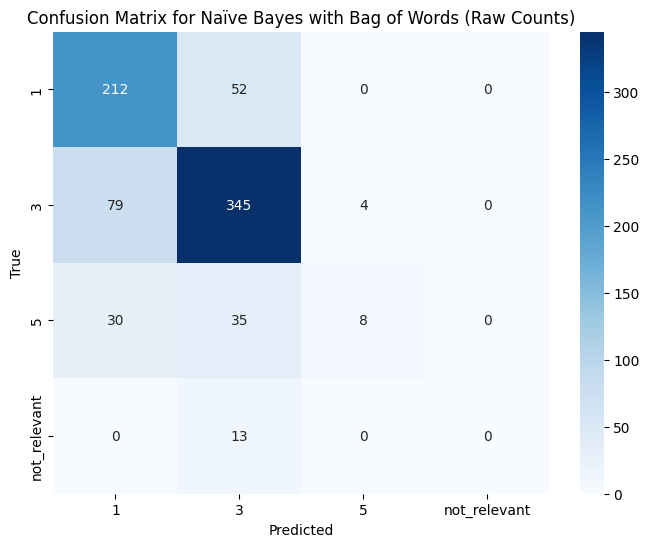


Results for Naïve Bayes with Bag of Words (TF-IDF) :
Accuracy: 0.7519280205655527
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.70      0.75       264
           3       0.73      0.92      0.81       428
           5       1.00      0.07      0.13        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.75       778
   macro avg       0.63      0.42      0.42       778
weighted avg       0.77      0.75      0.71       778



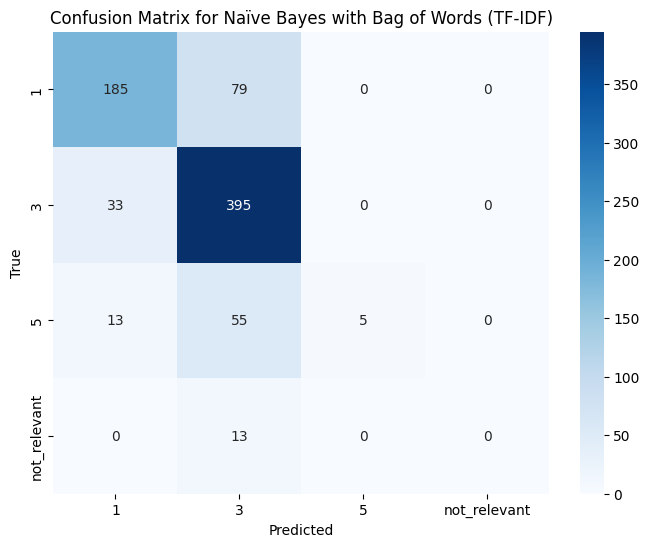


Results for Naïve Bayes with Unigrams :
Accuracy: 0.7262210796915167
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.80      0.72       264
           3       0.78      0.81      0.79       428
           5       0.67      0.11      0.19        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.73       778
   macro avg       0.53      0.43      0.43       778
weighted avg       0.71      0.73      0.70       778



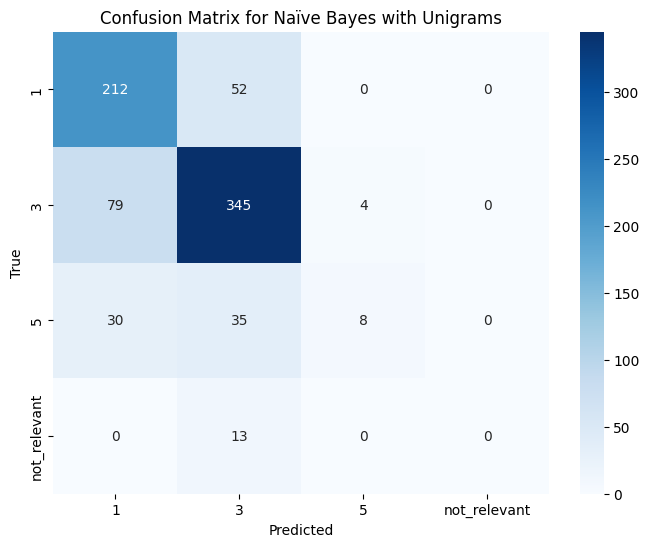


Results for Naïve Bayes with Bigrams :
Accuracy: 0.7287917737789203
Classification Report:
              precision    recall  f1-score   support

           1       0.73      0.69      0.71       264
           3       0.74      0.88      0.80       428
           5       0.40      0.14      0.20        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.73       778
   macro avg       0.47      0.43      0.43       778
weighted avg       0.70      0.73      0.70       778



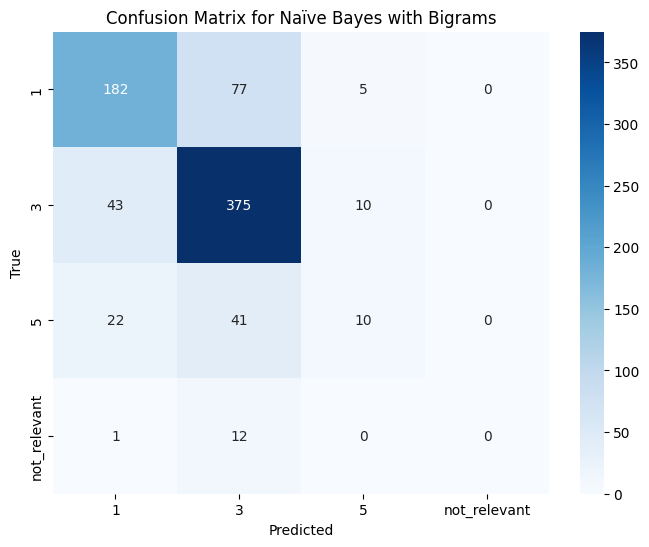


Results for Naïve Bayes with Trigrams :
Accuracy: 0.6619537275064268
Classification Report:
              precision    recall  f1-score   support

           1       0.72      0.44      0.55       264
           3       0.65      0.91      0.76       428
           5       0.50      0.10      0.16        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.66       778
   macro avg       0.47      0.36      0.37       778
weighted avg       0.65      0.66      0.62       778



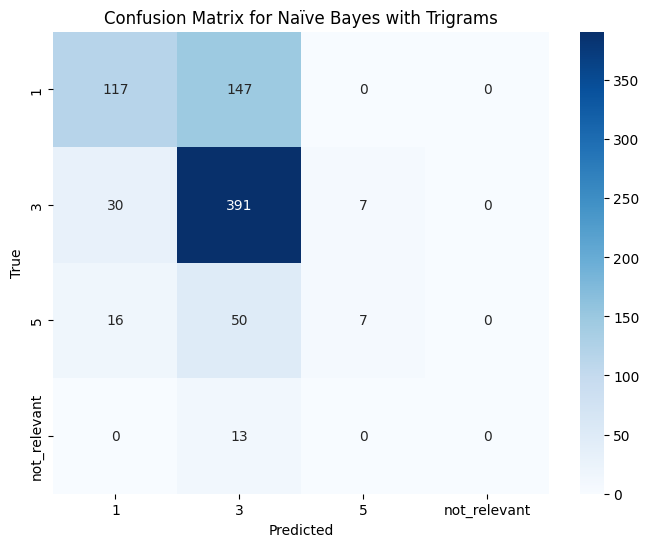

In [131]:
classifier_name = 'Naïve Bayes'
for i in range(len(results['Classifier'])):
    print("\nResults for", results['Classifier'][i], "with", results['Vectorizer'][i], ":")
    print(f"Accuracy: {results['Accuracy'][i]}")
    print(f"Classification Report:\n{results['Classification Report'][i]}")
    
    # Use the correct key for the classifier
    X_train_vec = vectorizers[results['Vectorizer'][i]].fit_transform(X_train)
    X_test_vec = vectorizers[results['Vectorizer'][i]].transform(X_test)
    classifiers[classifier_name].fit(X_train_vec, y_train)
    y_pred = classifiers[classifier_name].predict(X_test_vec)
    
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {classifier_name} with {results["Vectorizer"][i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


# Logistic Regression 

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(),
}
results = {'Classifier': [], 'Vectorizer': [], 'Accuracy': [], 'Classification Report': []}
for clf_name, clf in classifiers.items():
    for vec_name, vectorizer in vectorizers.items():
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        results['Classifier'].append(clf_name)
        results['Vectorizer'].append(vec_name)
        results['Accuracy'].append(accuracy)
        results['Classification Report'].append(classification_rep)


Results for Logistic Regression with Bag of Words (Raw Counts) :
Accuracy: 0.7493573264781491
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.72      0.75       264
           3       0.75      0.88      0.81       428
           5       0.54      0.21      0.30        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.75       778
   macro avg       0.51      0.45      0.46       778
weighted avg       0.72      0.75      0.73       778



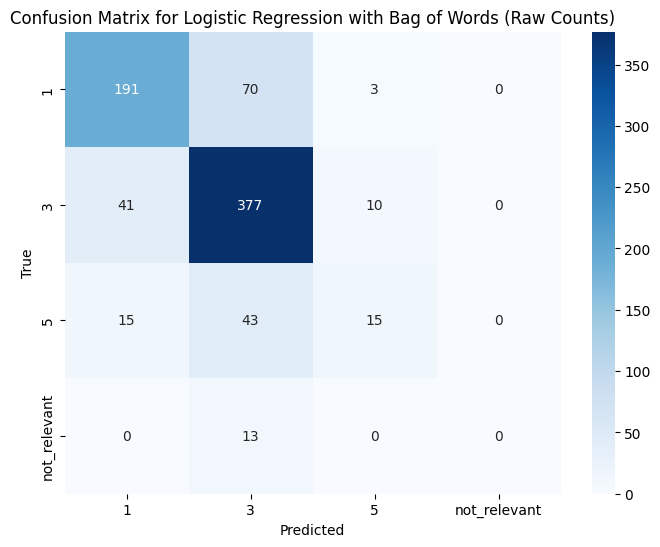


Results for Logistic Regression with Bag of Words (TF-IDF) :
Accuracy: 0.7403598971722365
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.70      0.73       264
           3       0.73      0.89      0.80       428
           5       0.69      0.15      0.25        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.74       778
   macro avg       0.55      0.43      0.44       778
weighted avg       0.73      0.74      0.71       778



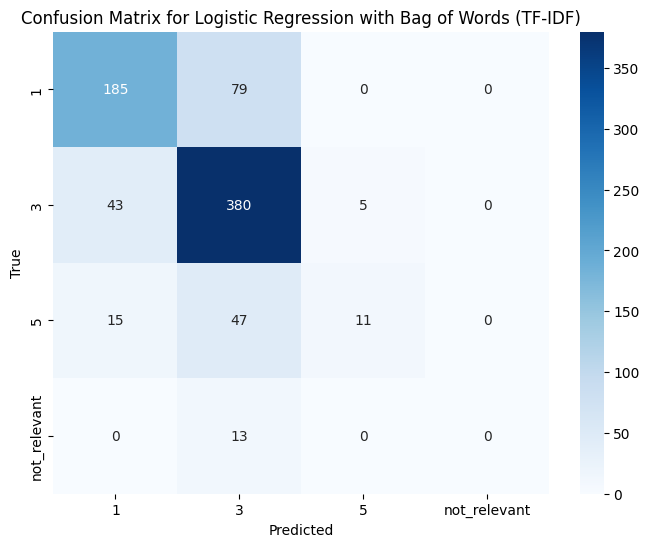


Results for Logistic Regression with Unigrams :
Accuracy: 0.7493573264781491
Classification Report:
              precision    recall  f1-score   support

           1       0.77      0.72      0.75       264
           3       0.75      0.88      0.81       428
           5       0.54      0.21      0.30        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.75       778
   macro avg       0.51      0.45      0.46       778
weighted avg       0.72      0.75      0.73       778



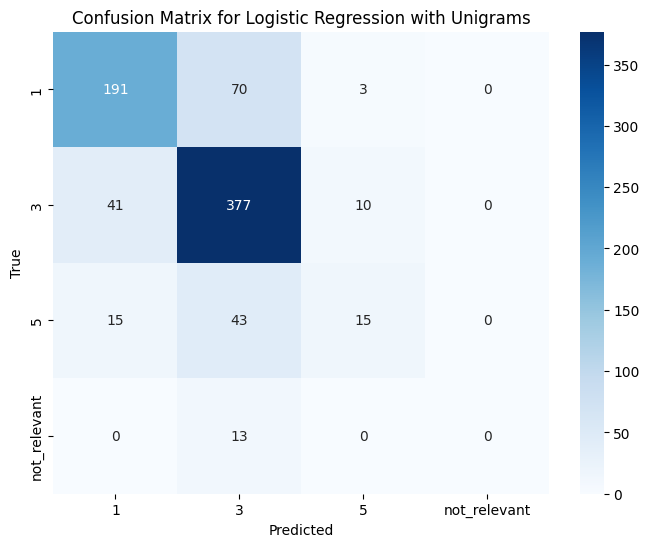


Results for Logistic Regression with Bigrams :
Accuracy: 0.7043701799485861
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.65      0.66       264
           3       0.72      0.86      0.78       428
           5       0.75      0.12      0.21        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.70       778
   macro avg       0.54      0.41      0.41       778
weighted avg       0.69      0.70      0.67       778



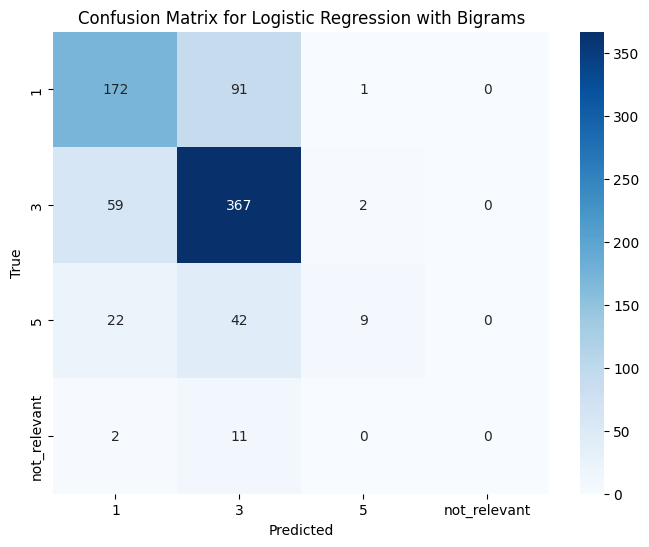


Results for Logistic Regression with Trigrams :
Accuracy: 0.6516709511568124
Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.35      0.48       264
           3       0.63      0.95      0.75       428
           5       0.80      0.11      0.19        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.65       778
   macro avg       0.55      0.35      0.36       778
weighted avg       0.68      0.65      0.60       778



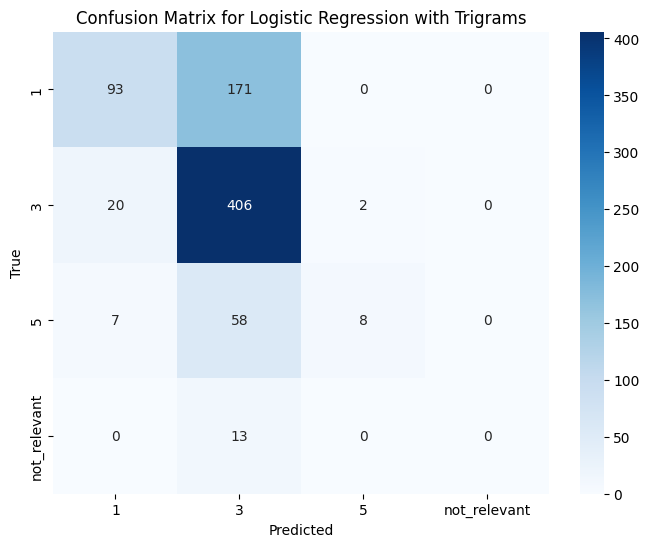

In [133]:
for i in range(len(results['Classifier'])):
    print("\nResults for", results['Classifier'][i], "with", results['Vectorizer'][i], ":")
    print(f"Accuracy: {results['Accuracy'][i]}")
    print(f"Classification Report:\n{results['Classification Report'][i]}")
    X_train_vec = vectorizers[results['Vectorizer'][i]].fit_transform(X_train)
    X_test_vec = vectorizers[results['Vectorizer'][i]].transform(X_test)
    classifiers[results['Classifier'][i]].fit(X_train_vec, y_train)
    y_pred = classifiers[results['Classifier'][i]].predict(X_test_vec)
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {results["Classifier"][i]} with {results["Vectorizer"][i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Randome Forest 

In [ ]:
classifiers = {
    'Random Forest': RandomForestClassifier(),
}
results = {'Classifier': [], 'Vectorizer': [], 'Accuracy': [], 'Classification Report': []}
for clf_name, clf in classifiers.items():
    for vec_name, vectorizer in vectorizers.items():
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        results['Classifier'].append(clf_name)
        results['Vectorizer'].append(vec_name)
        results['Accuracy'].append(accuracy)
        results['Classification Report'].append(classification_rep)



Results for Random Forest with Bag of Words (Raw Counts) :
Accuracy: 0.7416452442159382
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.71      0.73       264
           3       0.74      0.89      0.81       428
           5       0.77      0.14      0.23        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.74       778
   macro avg       0.56      0.43      0.44       778
weighted avg       0.73      0.74      0.71       778



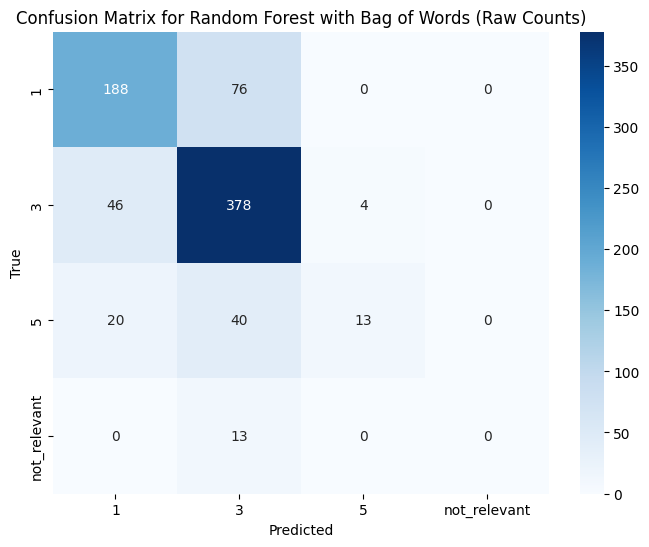


Results for Random Forest with Bag of Words (TF-IDF) :
Accuracy: 0.7480719794344473
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.72      0.73       264
           3       0.75      0.89      0.81       428
           5       0.69      0.15      0.25        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.75       778
   macro avg       0.55      0.44      0.45       778
weighted avg       0.73      0.75      0.72       778



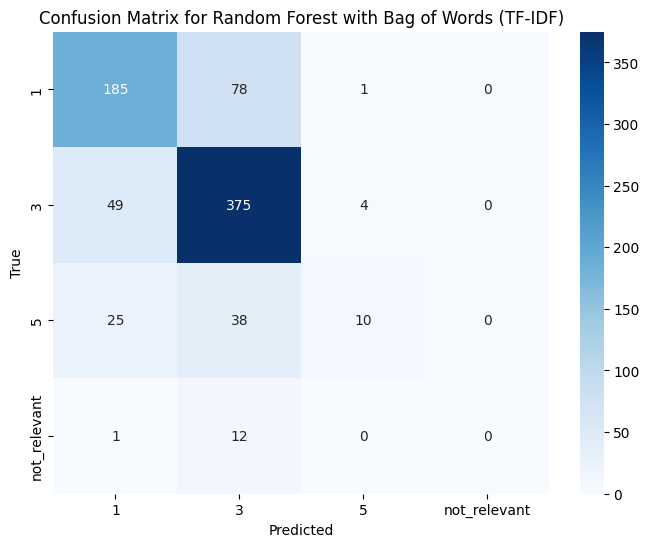


Results for Random Forest with Unigrams :
Accuracy: 0.7416452442159382
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.70      0.73       264
           3       0.74      0.88      0.81       428
           5       0.68      0.18      0.28        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.74       778
   macro avg       0.54      0.44      0.45       778
weighted avg       0.73      0.74      0.72       778



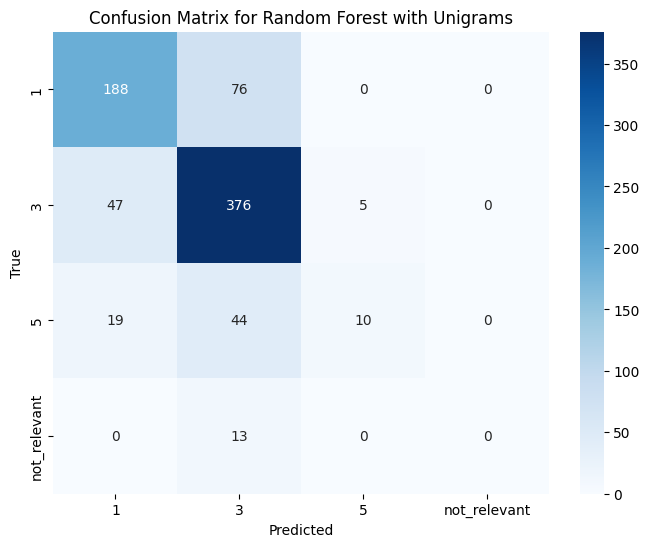


Results for Random Forest with Bigrams :
Accuracy: 0.6979434447300771
Classification Report:
              precision    recall  f1-score   support

           1       0.65      0.68      0.67       264
           3       0.72      0.83      0.77       428
           5       0.78      0.10      0.17        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.70       778
   macro avg       0.54      0.40      0.40       778
weighted avg       0.69      0.70      0.67       778



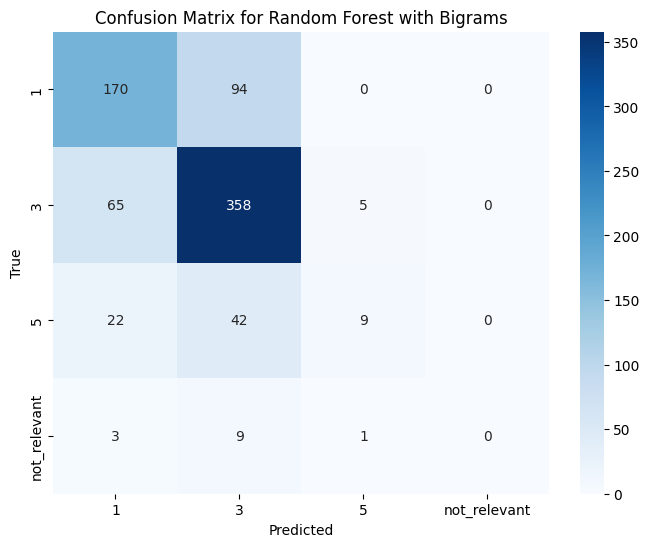


Results for Random Forest with Trigrams :
Accuracy: 0.5912596401028277
Classification Report:
              precision    recall  f1-score   support

           1       0.47      0.84      0.60       264
           3       0.79      0.54      0.64       428
           5       0.64      0.10      0.17        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.59       778
   macro avg       0.47      0.37      0.35       778
weighted avg       0.65      0.59      0.57       778



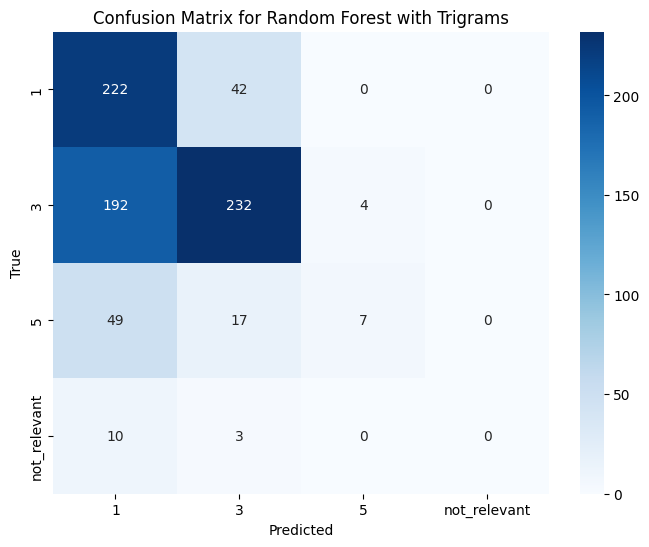

In [135]:
for i in range(len(results['Classifier'])):
    clf_name = results['Classifier'][i]
    vec_name = results['Vectorizer'][i]
    X_train_vec = vectorizers[vec_name].fit_transform(X_train)
    X_test_vec = vectorizers[vec_name].transform(X_test)
    classifiers[clf_name].fit(X_train_vec, y_train)
    y_pred = classifiers[clf_name].predict(X_test_vec)
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    print("\nResults for", clf_name, "with", vec_name, ":")
    print(f"Accuracy: {results['Accuracy'][i]}")
    print(f"Classification Report:\n{results['Classification Report'][i]}")
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {clf_name} with {vec_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# SVM

In [ ]:
classifiers = {
    'SVM': SVC(),
}
results = {'Classifier': [], 'Vectorizer': [], 'Accuracy': [], 'Classification Report': []}
for clf_name, clf in classifiers.items():
    for vec_name, vectorizer in vectorizers.items():
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        results['Classifier'].append(clf_name)
        results['Vectorizer'].append(vec_name)
        results['Accuracy'].append(accuracy)
        results['Classification Report'].append(classification_rep)




Results for SVM with Bag of Words (Raw Counts) :
Accuracy: 0.7352185089974294
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.68      0.71       264
           3       0.73      0.90      0.81       428
           5       0.88      0.10      0.17        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.74       778
   macro avg       0.59      0.42      0.42       778
weighted avg       0.74      0.74      0.70       778



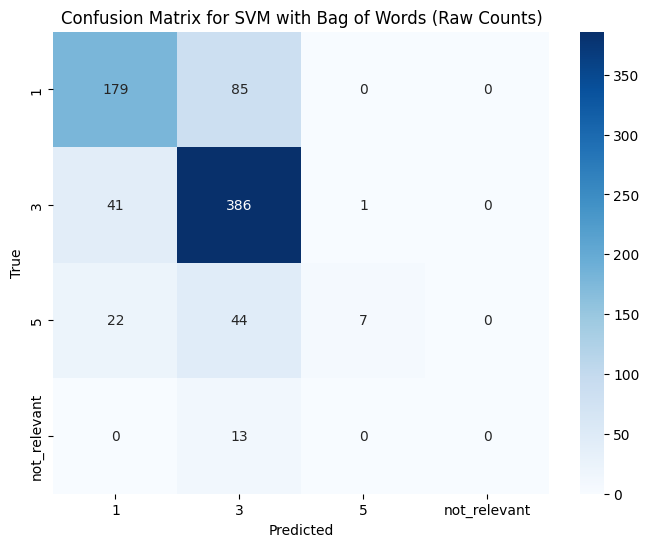


Results for SVM with Bag of Words (TF-IDF) :
Accuracy: 0.7506426735218509
Classification Report:
              precision    recall  f1-score   support

           1       0.76      0.71      0.73       264
           3       0.74      0.90      0.81       428
           5       0.85      0.15      0.26        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.75       778
   macro avg       0.59      0.44      0.45       778
weighted avg       0.75      0.75      0.72       778



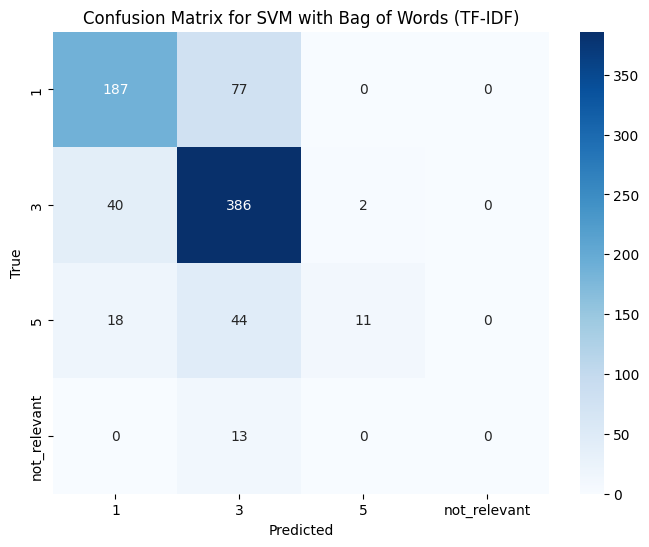


Results for SVM with Unigrams :
Accuracy: 0.7352185089974294
Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.68      0.71       264
           3       0.73      0.90      0.81       428
           5       0.88      0.10      0.17        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.74       778
   macro avg       0.59      0.42      0.42       778
weighted avg       0.74      0.74      0.70       778



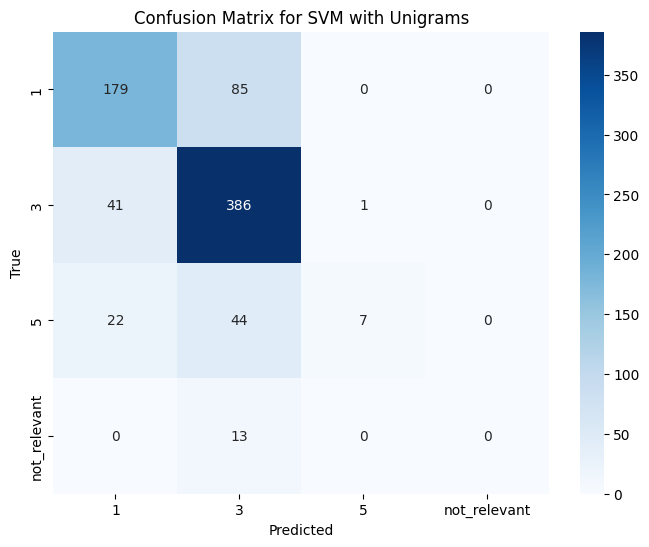


Results for SVM with Bigrams :
Accuracy: 0.6979434447300771
Classification Report:
              precision    recall  f1-score   support

           1       0.64      0.69      0.67       264
           3       0.73      0.83      0.78       428
           5       0.86      0.08      0.15        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.70       778
   macro avg       0.56      0.40      0.40       778
weighted avg       0.70      0.70      0.67       778



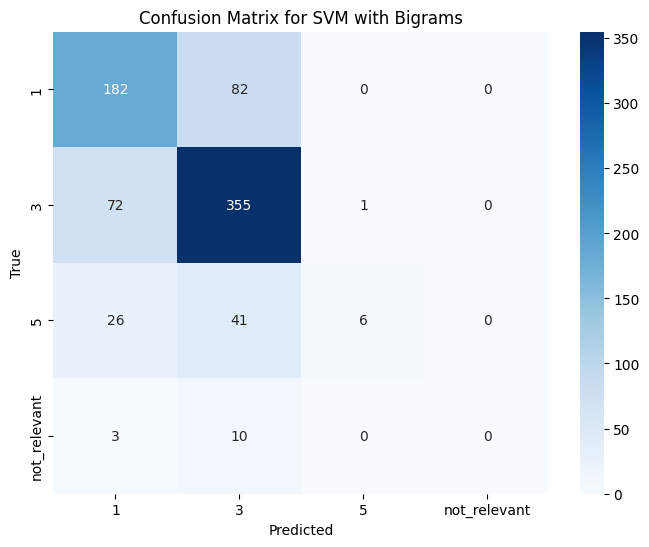


Results for SVM with Trigrams :
Accuracy: 0.6015424164524421
Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.15      0.25       264
           3       0.58      0.99      0.73       428
           5       0.86      0.08      0.15        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.60       778
   macro avg       0.58      0.30      0.28       778
weighted avg       0.70      0.60      0.50       778



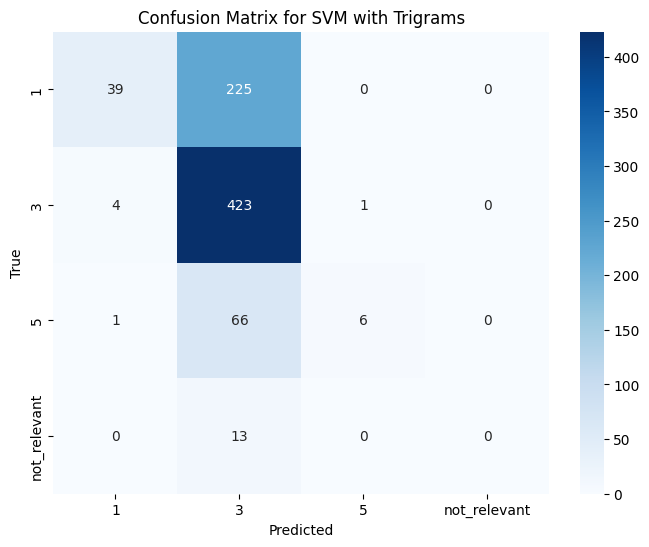

In [137]:
for i in range(len(results['Classifier'])):
    print("\nResults for", results['Classifier'][i], "with", results['Vectorizer'][i], ":")
    print(f"Accuracy: {results['Accuracy'][i]}")
    print(f"Classification Report:\n{results['Classification Report'][i]}")
    clf_name = results['Classifier'][i]
    vec_name = results['Vectorizer'][i]
    X_train_vec = vectorizers[vec_name].fit_transform(X_train)
    X_test_vec = vectorizers[vec_name].transform(X_test)
    classifiers[clf_name].fit(X_train_vec, y_train)
    y_pred = classifiers[clf_name].predict(X_test_vec)
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {clf_name} with {vec_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Perceptron

In [138]:
classifiers = {
    'Perceptron': Perceptron(),
}
results = {'Classifier': [], 'Vectorizer': [], 'Accuracy': [], 'Classification Report': []}
for clf_name, clf in classifiers.items():
    for vec_name, vectorizer in vectorizers.items():
        X_train_vec = vectorizer.fit_transform(X_train)
        X_test_vec = vectorizer.transform(X_test)
        clf.fit(X_train_vec, y_train)
        y_pred = clf.predict(X_test_vec)
        accuracy = accuracy_score(y_test, y_pred)
        classification_rep = classification_report(y_test, y_pred)
        results['Classifier'].append(clf_name)
        results['Vectorizer'].append(vec_name)
        results['Accuracy'].append(accuracy)
        results['Classification Report'].append(classification_rep)



Results for Perceptron with Bag of Words (Raw Counts) :
Accuracy: 0.7339331619537275
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.66      0.72       264
           3       0.73      0.89      0.80       428
           5       0.49      0.23      0.31        73
not_relevant       0.17      0.08      0.11        13

    accuracy                           0.73       778
   macro avg       0.55      0.46      0.49       778
weighted avg       0.72      0.73      0.72       778



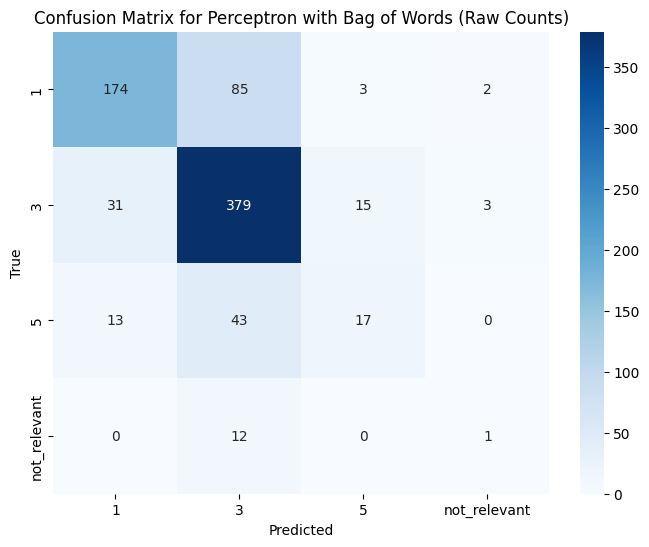


Results for Perceptron with Bag of Words (TF-IDF) :
Accuracy: 0.7005141388174807
Classification Report:
              precision    recall  f1-score   support

           1       0.66      0.80      0.72       264
           3       0.77      0.73      0.75       428
           5       0.51      0.29      0.37        73
not_relevant       0.08      0.08      0.08        13

    accuracy                           0.70       778
   macro avg       0.51      0.47      0.48       778
weighted avg       0.70      0.70      0.69       778



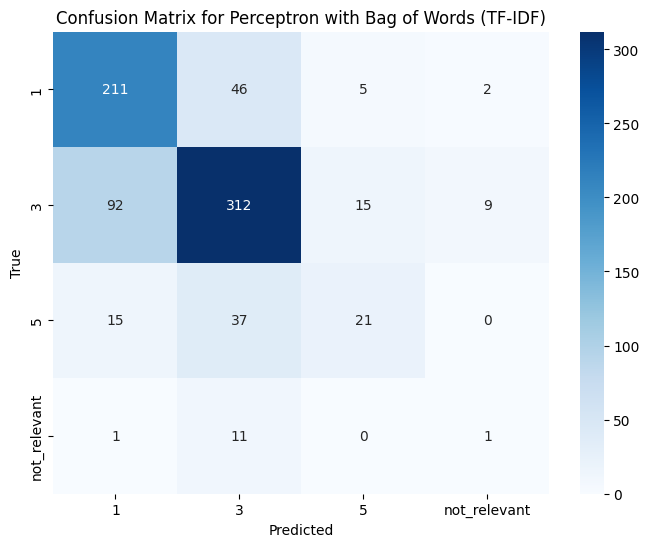


Results for Perceptron with Unigrams :
Accuracy: 0.7339331619537275
Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.66      0.72       264
           3       0.73      0.89      0.80       428
           5       0.49      0.23      0.31        73
not_relevant       0.17      0.08      0.11        13

    accuracy                           0.73       778
   macro avg       0.55      0.46      0.49       778
weighted avg       0.72      0.73      0.72       778



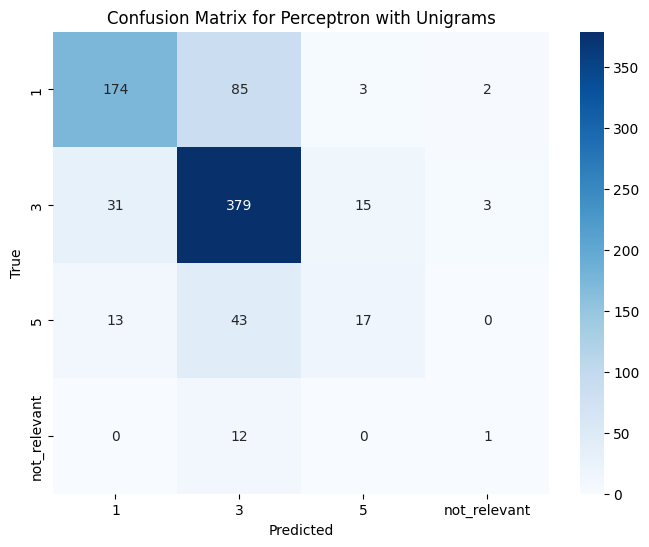


Results for Perceptron with Bigrams :
Accuracy: 0.6516709511568124
Classification Report:
              precision    recall  f1-score   support

           1       0.63      0.67      0.65       264
           3       0.71      0.73      0.72       428
           5       0.42      0.23      0.30        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.65       778
   macro avg       0.44      0.41      0.42       778
weighted avg       0.64      0.65      0.64       778



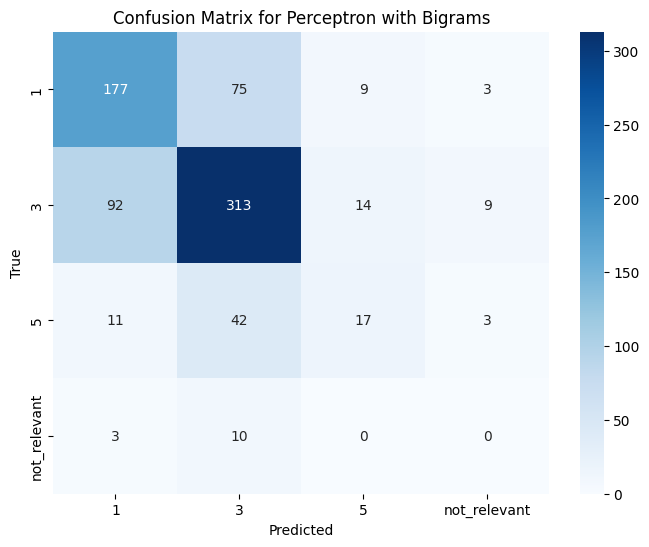


Results for Perceptron with Trigrams :
Accuracy: 0.6208226221079691
Classification Report:
              precision    recall  f1-score   support

           1       0.62      0.46      0.53       264
           3       0.64      0.81      0.72       428
           5       0.42      0.19      0.26        73
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.62       778
   macro avg       0.42      0.37      0.38       778
weighted avg       0.60      0.62      0.60       778



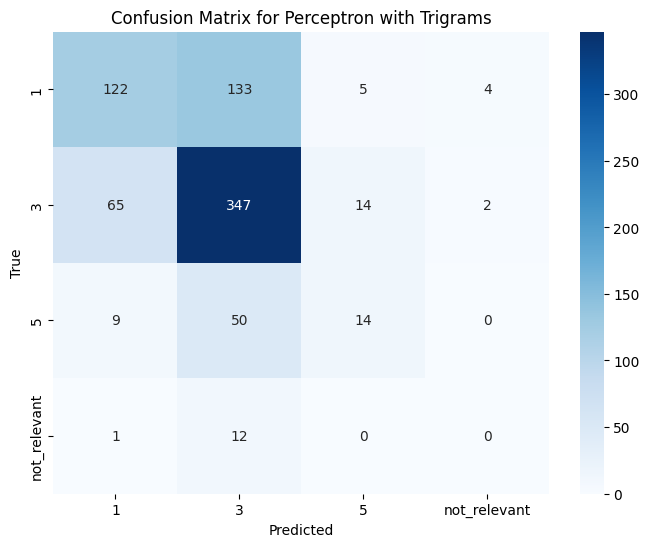

In [139]:
for i in range(len(results['Classifier'])):
    print("\nResults for", results['Classifier'][i], "with", results['Vectorizer'][i], ":")
    print(f"Accuracy: {results['Accuracy'][i]}")
    print(f"Classification Report:\n{results['Classification Report'][i]}")
    X_train_vec = vectorizers[results['Vectorizer'][i]].fit_transform(X_train)
    X_test_vec = vectorizers[results['Vectorizer'][i]].transform(X_test)
    classifiers[results['Classifier'][i]].fit(X_train_vec, y_train)
    y_pred = classifiers[results['Classifier'][i]].predict(X_test_vec)
    cm = confusion_matrix(y_test, y_pred, labels=class_names)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Confusion Matrix for {results["Classifier"][i]} with {results["Vectorizer"][i]}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()